In [1]:
# CÉLULA 1: INSTALAÇÃO E IMPORTAÇÃO
# Garante a instalação da biblioteca python-control e importação de dependências.

print("Iniciando instalação da biblioteca de controle...")
!pip install control
!pip install numpy scipy matplotlib

import control.matlab as ctrl
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Markdown as md
import warnings

# Suprime o aviso de uso do control.matlab
warnings.filterwarnings("ignore", category=UserWarning)
print("Configurações concluídas. Prossiga para as células seguintes.")

Iniciando instalação da biblioteca de controle...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.3/578.3 kB 6.2 MB/s eta 0:00:00
Configurações concluídas. Prossiga para as células seguintes.


<>:41: SyntaxWarning: invalid escape sequence '\i'
<>:41: SyntaxWarning: invalid escape sequence '\i'
<>:43: SyntaxWarning: invalid escape sequence '\i'
<>:82: SyntaxWarning: invalid escape sequence '\i'
<>:83: SyntaxWarning: invalid escape sequence '\i'
<>:86: SyntaxWarning: invalid escape sequence '\i'
<>:41: SyntaxWarning: invalid escape sequence '\i'
<>:41: SyntaxWarning: invalid escape sequence '\i'
<>:43: SyntaxWarning: invalid escape sequence '\i'
<>:82: SyntaxWarning: invalid escape sequence '\i'
<>:83: SyntaxWarning: invalid escape sequence '\i'
<>:86: SyntaxWarning: invalid escape sequence '\i'
/tmp/ipython-input-3381489910.py:41: SyntaxWarning: invalid escape sequence '\i'
  
/tmp/ipython-input-3381489910.py:41: SyntaxWarning: invalid escape sequence '\i'
  
/tmp/ipython-input-3381489910.py:43: SyntaxWarning: invalid escape sequence '\i'
  plt.plot(T_out, y0_deg, label='Tipo 0 ($e_{{ss}} \\to \infty$)') # Corrigido aqui
/tmp/ipython-input-3381489910.py:82: SyntaxWarning: inv

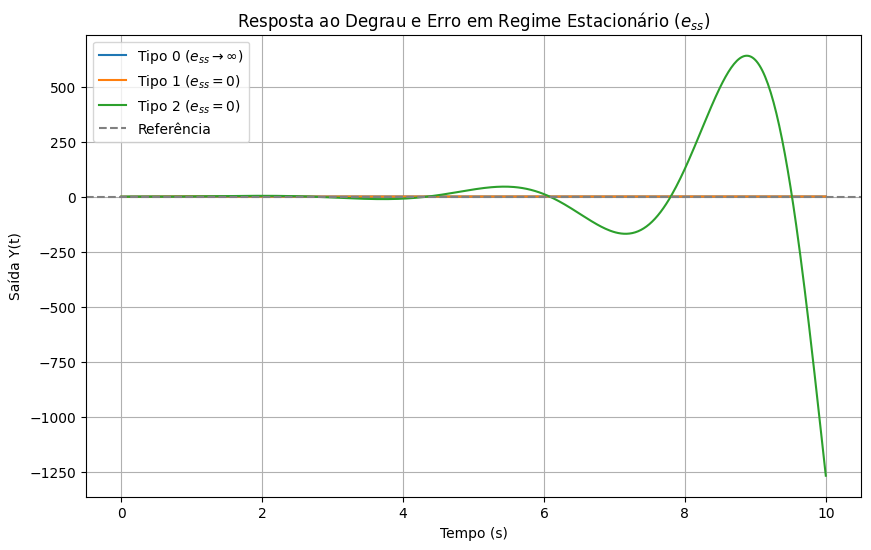

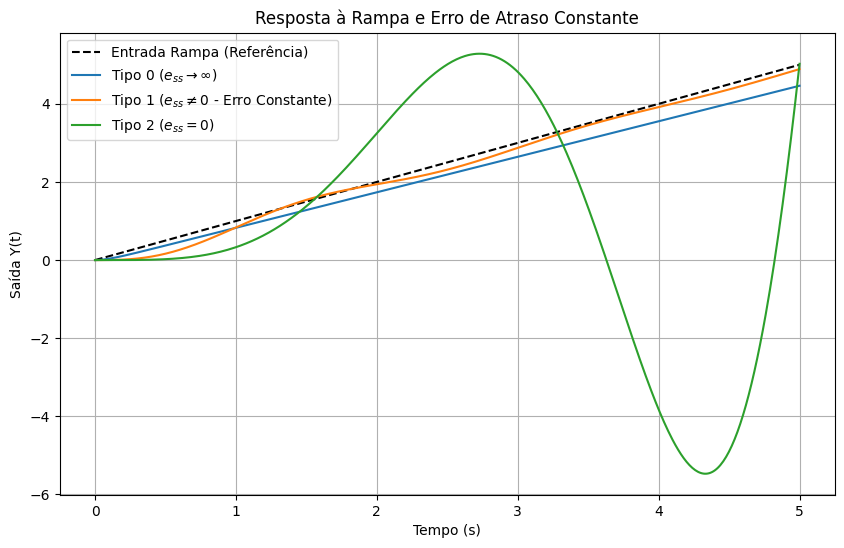

In [3]:
# CÉLULA 2: Simulação do Erro em Regime Estacionário e Tipo de Sistema

# --- Configurações e Parâmetros (Módulo 5.6) ---

md("### Módulo 5.6: Erro em Regime Estacionário ($e_{ss}$) e Tipo de Sistema")

K_gain = 10.0
tau = 1.0

# 1. Sistema Tipo 0: L(s) = K / (s + 1)
L0 = ctrl.tf([K_gain], [1, 1])
T0 = ctrl.feedback(L0, 1)

# 2. Sistema Tipo 1: L(s) = K / (s(s + 1))
L1 = ctrl.tf([K_gain], [1, 1, 0])
T1 = ctrl.feedback(L1, 1)

# 3. Sistema Tipo 2: L(s) = K / (s^2 * (s + 1))
L2 = ctrl.tf([K_gain], [1, 1, 0, 0])
T2 = ctrl.feedback(L2, 1)

T_sim = np.linspace(0, 10, 500)

# --- Entrada 1: Degrau Unitário (R(s) = 1/s) ---

# Simulação da Resposta ao Degrau
y0_deg, T_out = ctrl.step(T0, T_sim)
y1_deg, _ = ctrl.step(T1, T_sim)
y2_deg, _ = ctrl.step(T2, T_sim)

# Cálculo do Erro em Regime Estacionário (e_ss = 1 - y_final)
ess_0_deg = 1 - y0_deg[-1]
ess_1_deg = 1 - y1_deg[-1]

# CORREÇÃO: Usando {{ss}} e {{ss}} para que o Python não procure uma variável 'ss'
md(f"""##### Degrau Unitário ($R(s) = 1/s$)
1.  **Tipo 0 ($N=0$):** $K_p = {K_gain}$. $e_{{ss}} = A / (1 + K_p) = 1 / 11$. Simulação: $\\approx {ess_0_deg:.3f}$
2.  **Tipo 1 ($N=1$):** $K_p = \infty$. $e_{{ss}} = 0$. Simulação: $\\approx {ess_1_deg:.3f}$
3.  **Tipo 2 ($N=2$):** $K_p = \infty$. $e_{{ss}} = 0$.
""")

plt.figure(figsize=(10, 6))
plt.plot(T_out, y0_deg, label='Tipo 0 ($e_{{ss}} \\to \infty$)') # Corrigido aqui
plt.plot(T_out, y1_deg, label='Tipo 1 ($e_{{ss}} = 0$)')
plt.plot(T_out, y2_deg, label='Tipo 2 ($e_{{ss}} = 0$)')
plt.axhline(1.0, color='gray', linestyle='--', label='Referência')
plt.title('Resposta ao Degrau e Erro em Regime Estacionário ($e_{{ss}}$)')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída Y(t)')
plt.legend()
plt.grid(True)
plt.show()

# --- Entrada 2: Rampa Unitária (r(t) = t, R(s) = 1/s^2) ---

# Criação do Sinal de Rampa
t_ramp = np.linspace(0, 5, 500)
u_ramp = t_ramp

# Simulação LSIM (Linear Simulation)

# Tipo 0: Lsim e_ss = Inf
y0_ramp, T_out_r, x = ctrl.lsim(T0, u_ramp, t_ramp)
e0_ramp = u_ramp - y0_ramp
ess_0_ramp = e0_ramp[-1]

# Tipo 1: Lsim e_ss = A / Kv
y1_ramp, T_out_r, x = ctrl.lsim(T1, u_ramp, t_ramp)
e1_ramp = u_ramp - y1_ramp
ess_1_ramp = e1_ramp[-1]

# Tipo 2: Lsim e_ss = 0
y2_ramp, T_out_r, x = ctrl.lsim(T2, u_ramp, t_ramp)
e2_ramp = u_ramp - y2_ramp
ess_2_ramp = e2_ramp[-1]

# Corrigido aqui (linha 74)
md(f"""##### Rampa Unitária ($R(s) = 1/s^2$)
1.  **Tipo 0 ($N=0$):** $K_v = 0$. $e_{{ss}} = \infty$. Simulação (erro final): $\\approx {ess_0_ramp:.3f}$
2.  **Tipo 1 ($N=1$):** $K_v = {K_gain}$. $e_{{ss}} = A / K_v = 1 / 10$. Simulação (erro final): $\\approx {ess_1_ramp:.3f}$
3.  **Tipo 2 ($N=2$):** $K_v = \infty$. $e_{{ss}} = 0$. Simulação (erro final): $\\approx {ess_2_ramp:.3f}$
""")

plt.figure(figsize=(10, 6))
plt.plot(T_out_r, u_ramp, 'k--', label='Entrada Rampa (Referência)')
plt.plot(T_out_r, y0_ramp, label='Tipo 0 ($e_{{ss}} \\to \infty$)')
plt.plot(T_out_r, y1_ramp, label=f'Tipo 1 ($e_{{ss}} \\neq 0$ - Erro Constante)') # Corrigido aqui
plt.plot(T_out_r, y2_ramp, label='Tipo 2 ($e_{{ss}} = 0$)')
plt.title('Resposta à Rampa e Erro de Atraso Constante')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída Y(t)')
plt.legend()
plt.grid(True)
plt.show()